In [1]:
# Loading Data
import pandas as pd
import numpy as np
import nltk

df = pd.read_excel("C:/Users/Mirtha/Downloads/Source Code Skripsi/User Story and User Story Scenario_Revisi 2 - Copy.xlsx")
df = df.fillna('')
df


,Project Name,Nama Fitur,User Story,Scenario,Scenario.1,Scenario.2,Scenario.3,Scenario.4,Scenario.5,Scenario.6,Scenario.7,Scenario.8,Scenario.9,Scenario.10,Effort
0,Akobesi,Login,"In order to access curriculum data\nAs Admin,\...",Scenario: Login Successfully as Admin \nGiven ...,Scenario: Login Successfully as Curriculum Tea...,Scenario: Login Successfully as Lecturer \nGiv...,Scenario: Login Failed due to Incorrect NIP or...,,,,,,,,M
1,Akobesi,Logout,"In order to secure my session\nAs Admin,\nI wa...",Scenario: Log out Successfully \nGiven I am on...,,,,,,,,,,,S
2,Akobesi,Reset Password,In order to log in to the system in case I for...,Scenario: Password Reset Successfully\nGiven I...,Scenario: Password Reset Failed due to a misma...,,,,,,,,,,M
3,Akobesi,Change Password,"In order to secure my account\nAs Lecturer,\nI...",Scenario: Password Change Successfully\nGiven ...,Scenario: Password Change Failed due to a mism...,Scenario: Password Change Failed due to incorr...,,,,,,,,,S
4,Akobesi,Create Program Outcomes,In order to establish Program Outcomes\nAs Cur...,Scenario: Create Program Outcomes Successfully...,Scenario: Create Program Outcomes Failed as th...,Scenario: Create Program Outcomes Failed Due t...,,,,,,,,,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,User Story Generator,Update user story,"In order to improve user story\nAs User,\nI wa...",Scenario: Update user story successfully\nGive...,Scenario: Update user story failed due to empt...,,,,,,,,,,S
166,User Story Generator,Create user story scenario,In order to generate detailed user story \nAs ...,Scenario: Create user story scenario successfu...,Scenario: Create user story scenario failed du...,,,,,,,,,,XXL
167,User Story Generator,Update user story scenario,In order to improve detailed user story \nAs U...,Scenario: Update user story scenario successfu...,Scenario: Update user story scenario failed du...,,,,,,,,,,S
168,User Story Generator,Read user story History,In order to review the relevant user story\nAs...,Scenario: Read user story History Successfully...,Scenario: Read user story history failed due t...,,,,,,,,,,S


In [2]:
# Menggabungkan Data Setiap Kolom
df['combined'] = df.iloc[:, 1:13].apply(lambda x: '\n'.join(x), axis=1)

# Menampilkan hasil gabungan setiap kolom
print(df.loc[0, 'combined'])

Login
In order to access curriculum data
As Admin,
I want to log in to the system
Scenario: Login Successfully as Admin 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “32525252523”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/admin”
And the “Lecturer Name” field should contain “Admin”
Scenario: Login Successfully as Curriculum Team Member
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “197801262006041001”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/curriculum”
And the “Lecturer Name” field should contain “Badrus Zaman, S.Kom., M.Cs.”	
Scenario: Login Successfully as Lecturer 
Given I am on “http://127.0.0.1:8000/login”
When I fill in “NIP” with “198110282006041003”
And I fill in “Password” with “coba123”
And I press “Login”
Then the url should match “http://127.0.0.1:8000/dashboard/lecturer”
A

Text Feature Extraction

In [3]:
# Case Folding and Remove Template
import re

def case_folding(text):
    return text.lower()

def remove_template_phrases(text):
    template_texts = [
        "In order to",
        "As",
        "I want",
        "I am on",
        "I press",
        "I follow",
        "I fill in",
        "I select",
        "I check",
        "I uncheck",
        "I attach the file",
        "I should see",
        "The response should contain",
        "field should contain",
        "checkbox should be checked",
        "checkbox should not be checked",
        "I should be on",
        "The url should match"
    ]

    pattern = r'\s+(' + '|'.join(template_texts) + r')\s+'
    return re.sub(pattern, ' ', text, flags=re.IGNORECASE)

df['combined'] = df['combined'].apply(case_folding)
df['combined'] = df['combined'].apply(remove_template_phrases)

In [4]:
# Remove Punctuation, Tokenisasi, Stopword Removal
import string
def remove_punctuation(text):
    punctuation_to_replace = string.punctuation + "‘’“”"
    translation_table = str.maketrans(punctuation_to_replace, ' ' * len(punctuation_to_replace))
    cleaned_text = text.translate(translation_table)
    return cleaned_text

df['combined'] = df['combined'].apply(remove_punctuation)
print("Hasil pembersihan teks dari tanda baca")
print(df.loc[0, 'combined'])

# Tokenisasi
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

df['combined'] = df['combined'].apply(lambda x: word_tokenize(x))
print("Hasil tokenisasi")
print(df['combined'])

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Stopword removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [token for token in tokens if token.lower() not in stop_words]

df['combined'] = df['combined'].apply(remove_stopwords)
print("Hasil stopword removal")
print(df['combined'][4])

Hasil pembersihan teks dari tanda baca
login access curriculum data admin  to log in to the system
scenario  login successfully admin 
given  http   127 0 0 1 8000 login 
when  nip  with  32525252523 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard admin 
and the  lecturer name   admin 
scenario  login successfully curriculum team member
given  http   127 0 0 1 8000 login 
when  nip  with  197801262006041001 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard curriculum 
and the  lecturer name   badrus zaman  s kom   m cs  	
scenario  login successfully lecturer 
given  http   127 0 0 1 8000 login 
when  nip  with  198110282006041003 
and  password  with  coba123 
and  login 
then  http   127 0 0 1 8000 dashboard lecturer 
and the  lecturer name   indra kharisma r  s kom   m t  
scenario  login failed due to incorrect nip or password
given  http   127 0 0 1 8000 login 
when  nip  with  198110282006041003 
and  password  with 

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mirtha\AppData\Roaming\nltk_data...


Hasil stopword removal
['create', 'program', 'outcomes', 'establish', 'program', 'outcomes', 'curriculum', 'team', 'capability', 'create', 'program', 'outcomes', 'scenario', 'create', 'program', 'outcomes', 'successfully', 'given', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'curriculum', 'data', 'program', 'outcomes', 'program', 'outcomes', 'page', 'add', 'program', 'outcomes', 'creation', 'page', 'program', 'outcome', 'code', 'po1', 'program', 'outcome', 'description', 'graduates', 'possess', 'ability', 'analyze', 'design', 'create', 'comprehensively', 'evaluate', 'information', 'systems', 'alignment', 'organizational', 'goals', 'demonstrating', 'effective', 'proficiency', 'add', 'program', 'outcome', 'success', 'program', 'outcome', 'added', 'scenario', 'create', 'program', 'outcomes', 'failed', 'program', 'outcome', 'code', 'already', 'taken', 'given', 'http', '127', '0', '0', '1', '8000', 'dashboard', 'curriculum', 'data', 'program', 'outcomes', 'program', 'outcomes', 'page

[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Lematisasi
lemmatizer = WordNetLemmatizer()
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df['combined'] = df['combined'].apply(lemmatize_tokens)
print("Hasil lematisasi")
df['combined']

Hasil lematisasi


0      [login, access, curriculum, data, admin, log, ...
1      [logout, secure, session, admin, log, system, ...
2      [reset, password, log, system, case, forget, p...
3      [change, password, secure, account, lecturer, ...
4      [create, program, outcome, establish, program,...
                             ...                        
165    [update, user, story, improve, user, story, us...
166    [create, user, story, scenario, generate, deta...
167    [update, user, story, scenario, improve, detai...
168    [read, user, story, history, review, relevant,...
169    [delete, user, story, history, remove, irrelev...
Name: combined, Length: 170, dtype: object

In [6]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengembalikan ke bentuk string
df['combined'] = df['combined'].apply(lambda x: ' '.join(x))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

,04,100,105,127,15,197101042008121001,197102111997021001,197801262006041001,198105082005012001,198110282006041003,...,within,wlfv,workshop,world,wth,x0002,xlsx,yamamaru,year,zaman
0,0.0,0.0,0.0,0.127957,0.0,0.0,0.0,0.099597,0.0,0.115013,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099597
1,0.0,0.0,0.0,0.143281,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.080921,0.0,0.0,0.0,0.000000,0.0,0.056572,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.058762,0.0,0.0,0.0,0.000000,0.0,0.092430,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.024297,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.0,0.0,0.031194,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.087588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
166,0.0,0.0,0.0,0.048408,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.051780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
167,0.0,0.0,0.0,0.046194,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.043235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
168,0.0,0.0,0.0,0.053782,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [7]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Transform 'Effort' column
effort_encoded = encoder.fit_transform(df[['Effort']])

# Convert the encoded effort to a dense array
effort_dense_array = effort_encoded.toarray()

# Display the encoded result
print("Encoded 'Effort' categories:")
for label, encoded_label in zip(encoder.categories_[0], range(len(encoder.categories_[0]))):
    print(f"{label}: {encoded_label}")

# Display the dense array
print("Dense array representation of encoded 'Effort' categories:")
print(effort_dense_array)

Encoded 'Effort' categories:
L: 0
M: 1
S: 2
XL: 3
XXL: 4
Dense array representation of encoded 'Effort' categories:
[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [

Class distribution:
L: 0.07
M: 0.32
S: 0.49
XL: 0.04
XXL: 0.07
Total count of each class:
L: 12.0
M: 55.0
S: 84.0
XL: 7.0
XXL: 12.0


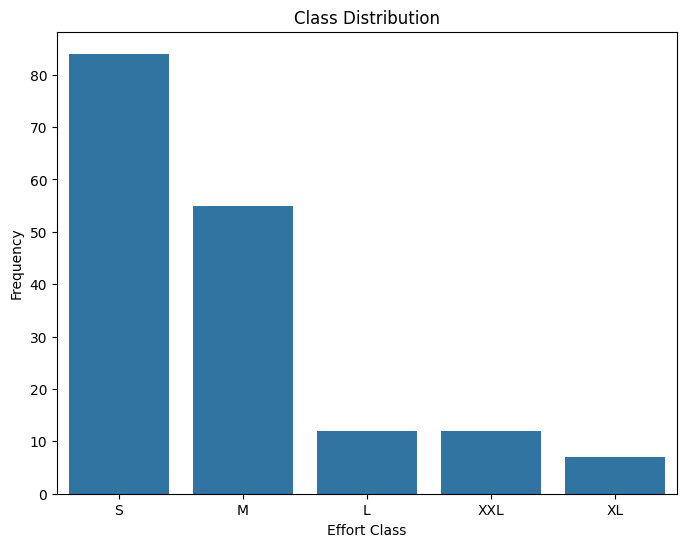

In [8]:
# Distribusi Kelas
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate class distribution
class_distribution = np.sum(effort_dense_array, axis=0) / len(effort_dense_array)

# Display class distribution
print("Class distribution:")
for label, distribution in zip(encoder.categories_[0], class_distribution):
    print(f"{label}: {distribution:.2f}")
# Calculate total count of each class
class_totals = np.sum(effort_dense_array, axis=0)

# Display total count of each class
print("Total count of each class:")
for label, total in zip(encoder.categories_[0], class_totals):
    print(f"{label}: {total}")

# Hitung total dari setiap kelas dalam target variabel (Effort)
class_distribution = df['Effort'].value_counts()

# Visualisasikan distribusi kelas menggunakan plot bar
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values)
plt.title('Class Distribution')
plt.xlabel('Effort Class')
plt.ylabel('Frequency')
plt.show()

====================Adaboost====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        10
           M       1.00      0.02      0.04        46
           S       0.24      1.00      0.38        18
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         3

   micro avg       0.24      0.24      0.24        79
   macro avg       0.25      0.20      0.09        79
weighted avg       0.64      0.24      0.11        79
 samples avg       0.24      0.24      0.24        79



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

Precision: 0.6362425049966689     Recall: 0.24050632911392406      Accuracy: 0.24050632911392406      F1 Score: 0.11203878265553459

Confusion matrix for test project 'Akobesi':


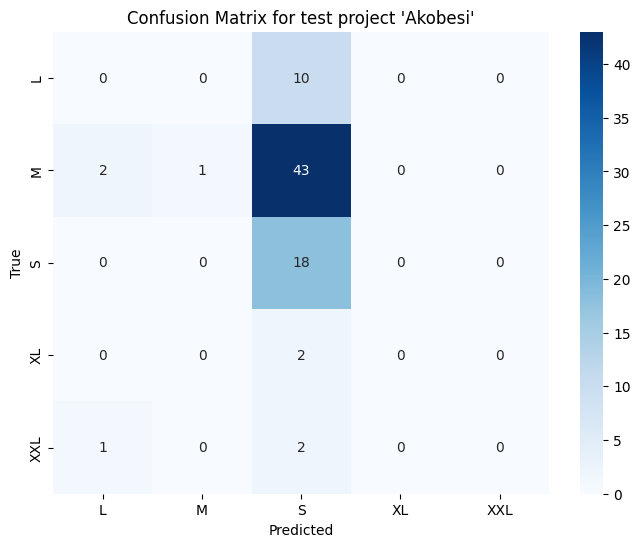

====================Decision Tree====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        10
           M       1.00      0.02      0.04        46
           S       0.21      0.89      0.34        18
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         3

   micro avg       0.20      0.22      0.21        79
   macro avg       0.24      0.18      0.08        79
weighted avg       0.63      0.22      0.10        79
 samples avg       0.21      0.22      0.21        79

Precision: 0.6308860759493672     Recall: 0.21518987341772153      Accuracy: 0.20253164556962025      F1 Score: 0.10317715437477736

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

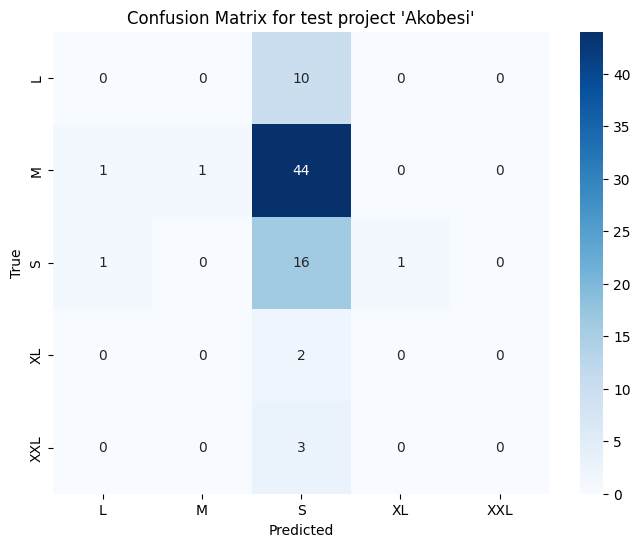

====================Multinomial Naive Bayes====================

Classification report for test project 'Akobesi':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00        10
           M       0.00      0.00      0.00        46
           S       0.23      1.00      0.37        18
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         3

   micro avg       0.23      0.23      0.23        79
   macro avg       0.05      0.20      0.07        79
weighted avg       0.05      0.23      0.08        79
 samples avg       0.23      0.23      0.23        79

Precision: 0.05191475725044063     Recall: 0.22784810126582278      Accuracy: 0.22784810126582278      F1 Score: 0.08456218191308887

Confusion matrix for test project 'Akobesi':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


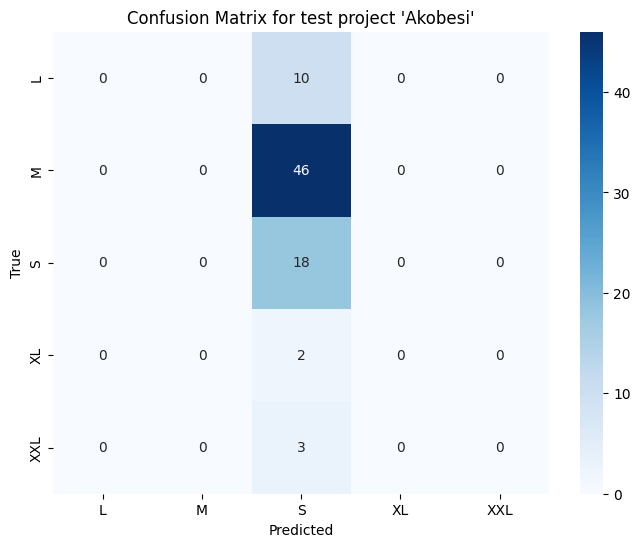

====================Adaboost====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.83      0.83      0.83         6
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       0.62      0.62      0.62         8
   macro avg       0.17      0.17      0.17         8
weighted avg       0.62      0.62      0.62         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.625     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.625

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

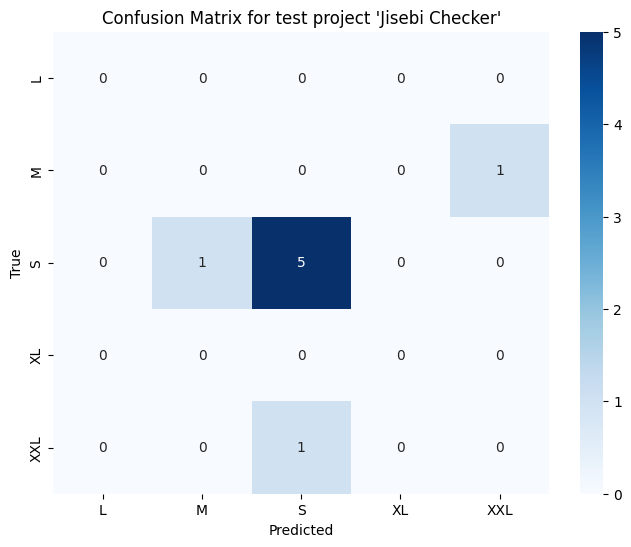

====================Decision Tree====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       1.00      0.83      0.91         6
          XL       0.00      0.00      0.00         0
         XXL       0.50      1.00      0.67         1

   micro avg       0.75      0.75      0.75         8
   macro avg       0.30      0.37      0.32         8
weighted avg       0.81      0.75      0.77         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.8125     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.7651515151515151

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

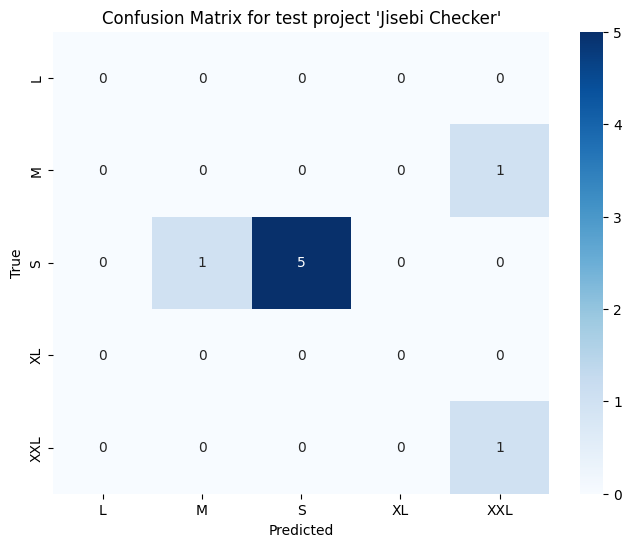

====================Multinomial Naive Bayes====================

Classification report for test project 'Jisebi Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.86      1.00      0.92         6
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       0.86      0.75      0.80         8
   macro avg       0.17      0.20      0.18         8
weighted avg       0.64      0.75      0.69         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.6428571428571428     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.6923076923076923

Confusion matrix for test project 'Jisebi Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

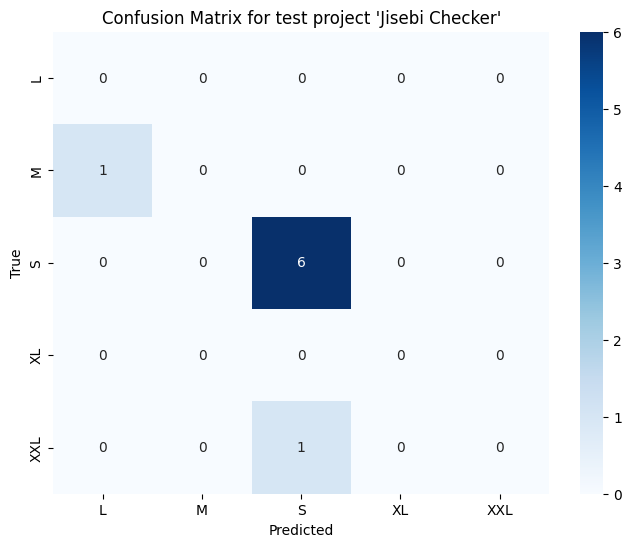

====================Adaboost====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80         9
          XL       0.00      0.00      0.00         0
         XXL       0.33      1.00      0.50         1

   micro avg       0.70      0.70      0.70        10
   macro avg       0.27      0.33      0.26        10
weighted avg       0.93      0.70      0.77        10
 samples avg       0.70      0.70      0.70        10

Precision: 0.9333333333333333     Recall: 0.7      Accuracy: 0.7      F1 Score: 0.77

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

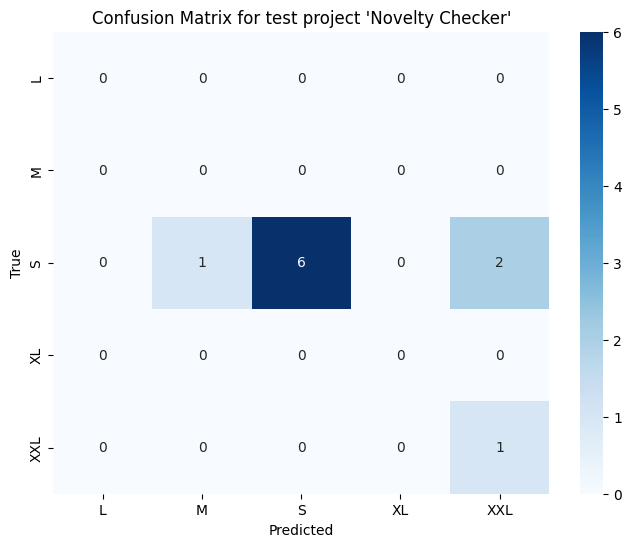

====================Decision Tree====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.67      0.80         9
          XL       0.00      0.00      0.00         0
         XXL       0.33      1.00      0.50         1

   micro avg       0.70      0.70      0.70        10
   macro avg       0.27      0.33      0.26        10
weighted avg       0.93      0.70      0.77        10
 samples avg       0.70      0.70      0.70        10

Precision: 0.9333333333333333     Recall: 0.7      Accuracy: 0.7      F1 Score: 0.77

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

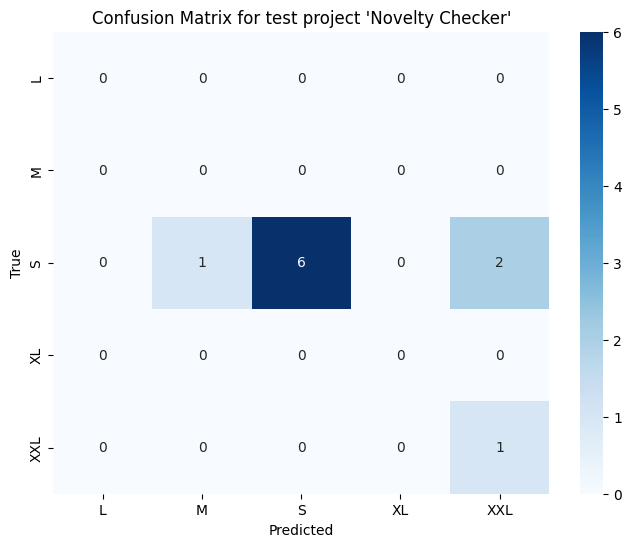

====================Multinomial Naive Bayes====================

Classification report for test project 'Novelty Checker':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      0.78      0.88         9
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         1

   micro avg       1.00      0.70      0.82        10
   macro avg       0.20      0.16      0.18        10
weighted avg       0.90      0.70      0.79        10
 samples avg       0.70      0.70      0.70        10

Precision: 0.9     Recall: 0.7      Accuracy: 0.7      F1 Score: 0.7875000000000001

Confusion matrix for test project 'Novelty Checker':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

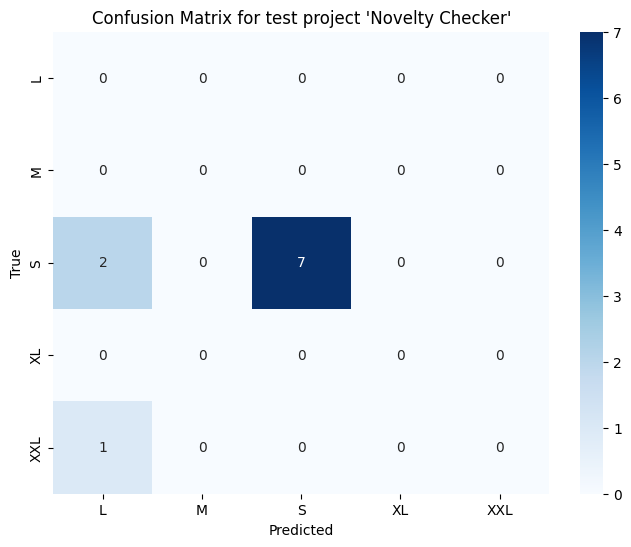

====================Adaboost====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.33      1.00      0.50         1
           S       0.86      0.60      0.71        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.70      0.50      0.58        14
   macro avg       0.24      0.32      0.24        14
weighted avg       0.64      0.50      0.54        14
 samples avg       0.50      0.50      0.50        14

Precision: 0.6360544217687075     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.5399159663865546

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

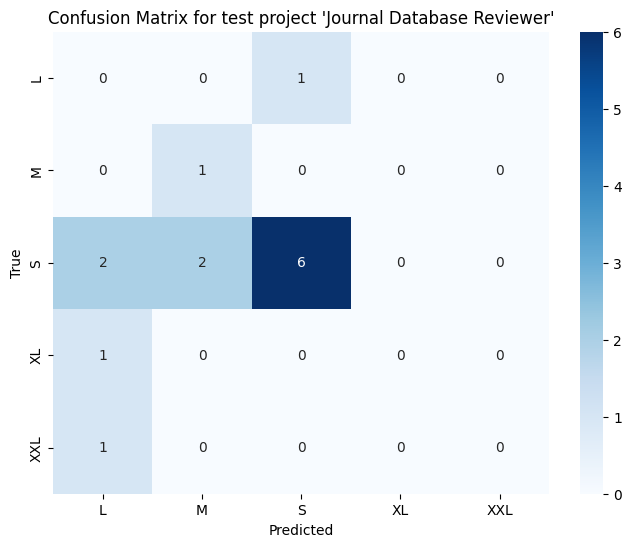

====================Decision Tree====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       1.00      1.00      1.00         1
           S       0.86      0.60      0.71        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.88      0.50      0.64        14
   macro avg       0.37      0.32      0.34        14
weighted avg       0.68      0.50      0.58        14
 samples avg       0.50      0.50      0.50        14

Precision: 0.6836734693877551     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.5756302521008403

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

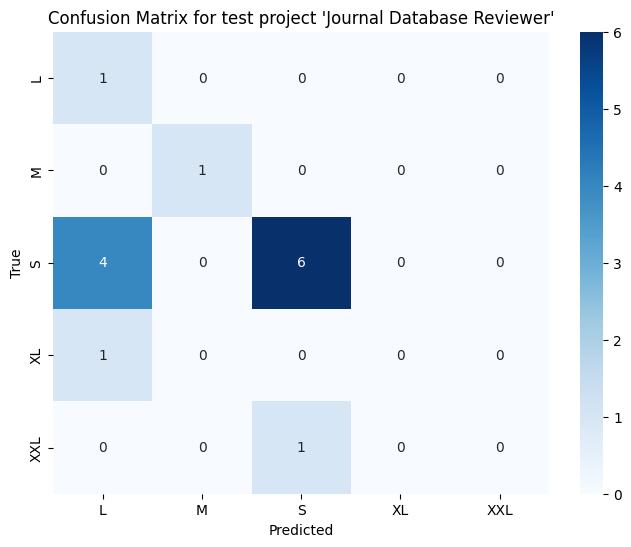

====================Multinomial Naive Bayes====================

Classification report for test project 'Journal Database Reviewer':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         1
           S       0.73      0.80      0.76        10
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         1

   micro avg       0.73      0.57      0.64        14
   macro avg       0.15      0.16      0.15        14
weighted avg       0.52      0.57      0.54        14
 samples avg       0.57      0.57      0.57        14

Precision: 0.5194805194805195     Recall: 0.5714285714285714      Accuracy: 0.5714285714285714      F1 Score: 0.54421768707483

Confusion matrix for test project 'Journal Database Reviewer':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

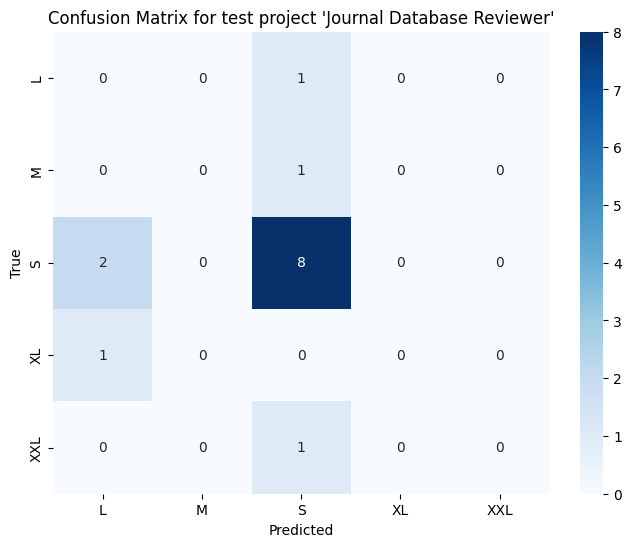

====================Adaboost====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.60      1.00      0.75         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.50      0.50      0.50         6
   macro avg       0.12      0.20      0.15         6
weighted avg       0.30      0.50      0.37         6
 samples avg       0.50      0.50      0.50         6

Precision: 0.3     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.37499999999999994

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

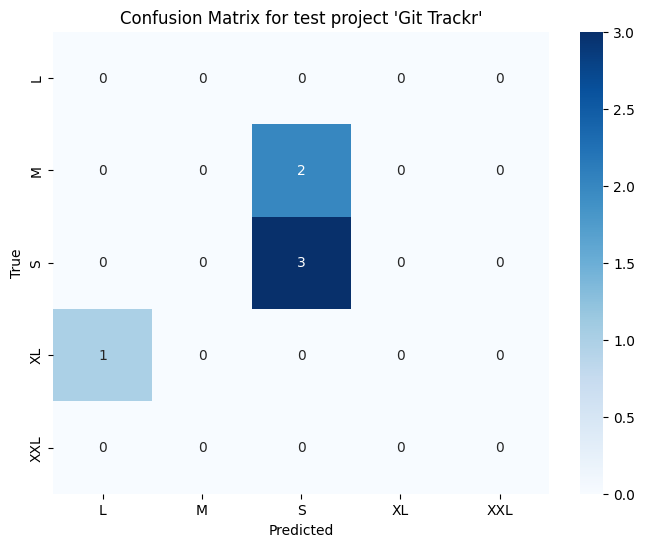

====================Decision Tree====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      0.50      0.67         2
           S       0.50      0.67      0.57         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.38      0.50      0.43         6
   macro avg       0.30      0.23      0.25         6
weighted avg       0.58      0.50      0.51         6
 samples avg       0.39      0.50      0.42         6

Precision: 0.5833333333333334     Recall: 0.5      Accuracy: 0.3333333333333333      F1 Score: 0.5079365079365079

Confusion matrix for test project 'Git Trackr':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

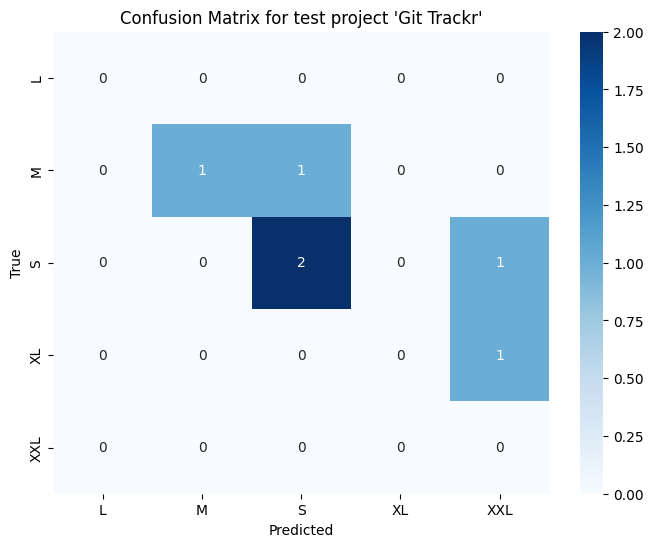

====================Multinomial Naive Bayes====================

Classification report for test project 'Git Trackr':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         2
           S       0.60      1.00      0.75         3
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.60      0.50      0.55         6
   macro avg       0.12      0.20      0.15         6
weighted avg       0.30      0.50      0.37         6
 samples avg       0.50      0.50      0.50         6



c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

Precision: 0.3     Recall: 0.5      Accuracy: 0.5      F1 Score: 0.37499999999999994

Confusion matrix for test project 'Git Trackr':


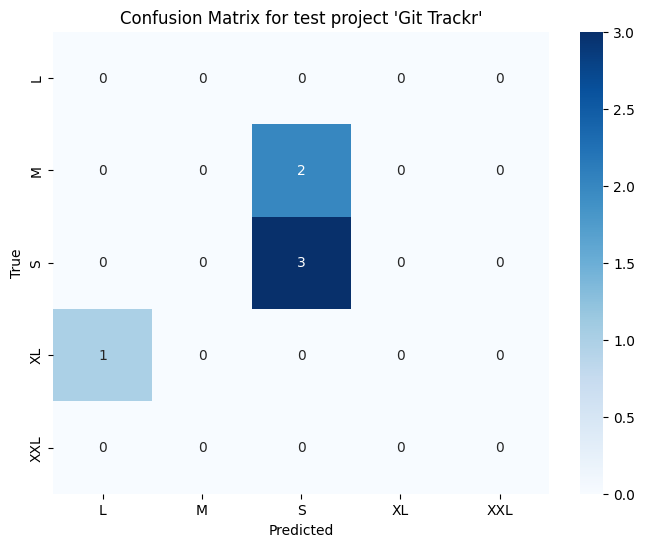

====================Adaboost====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       1.00      1.00      1.00         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.80      0.80      0.80         5
   macro avg       0.20      0.20      0.20         5
weighted avg       0.80      0.80      0.80         5
 samples avg       0.80      0.80      0.80         5

Precision: 0.8     Recall: 0.8      Accuracy: 0.8      F1 Score: 0.8

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

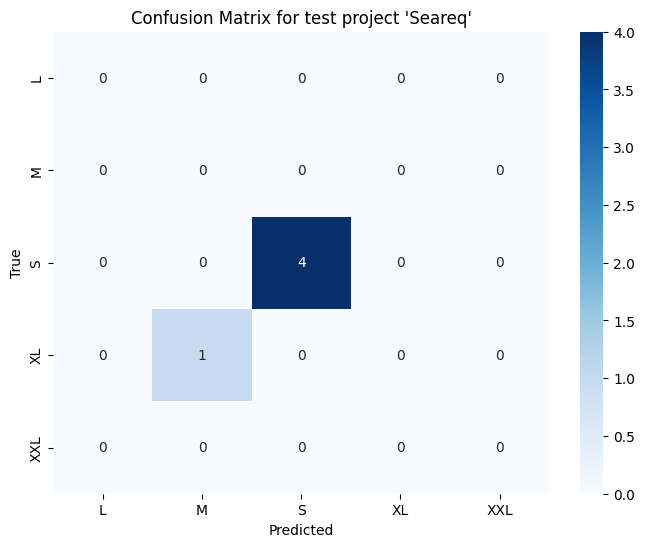

====================Decision Tree====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.75      0.75      0.75         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.75      0.60      0.67         5
   macro avg       0.15      0.15      0.15         5
weighted avg       0.60      0.60      0.60         5
 samples avg       0.60      0.60      0.60         5

Precision: 0.6     Recall: 0.6      Accuracy: 0.6      F1 Score: 0.6

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

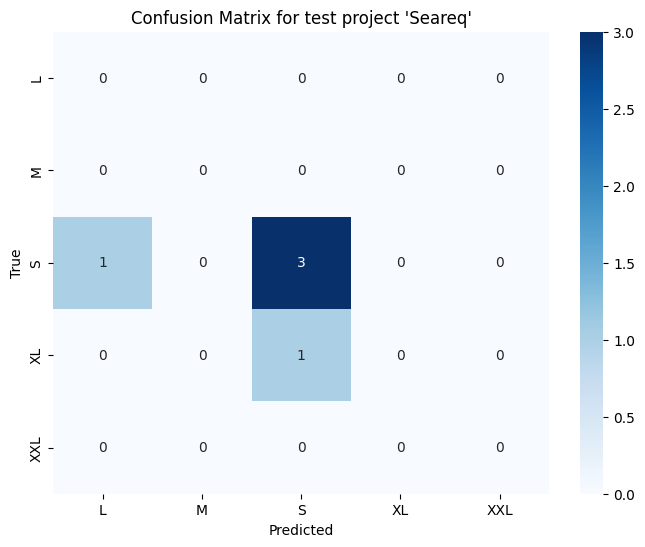

====================Multinomial Naive Bayes====================

Classification report for test project 'Seareq':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         0
           S       0.67      0.50      0.57         4
          XL       0.00      0.00      0.00         1
         XXL       0.00      0.00      0.00         0

   micro avg       0.67      0.40      0.50         5
   macro avg       0.13      0.10      0.11         5
weighted avg       0.53      0.40      0.46         5
 samples avg       0.40      0.40      0.40         5

Precision: 0.5333333333333333     Recall: 0.4      Accuracy: 0.4      F1 Score: 0.4571428571428572

Confusion matrix for test project 'Seareq':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

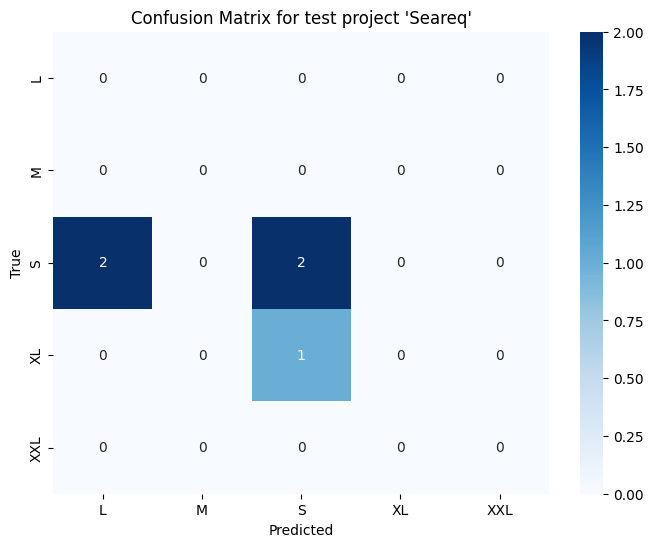

====================Adaboost====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       1.00      0.50      0.67         2
           S       0.93      0.87      0.90        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.82      0.78      0.80        18
   macro avg       0.39      0.27      0.31        18
weighted avg       0.88      0.78      0.82        18
 samples avg       0.78      0.78      0.78        18

Precision: 0.8849206349206349     Recall: 0.7777777777777778      Accuracy: 0.7777777777777778      F1 Score: 0.8212005108556834

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

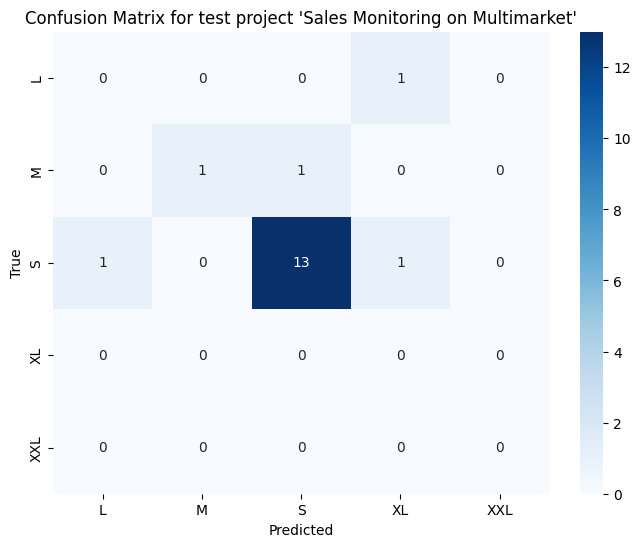

====================Decision Tree====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       1.00      0.50      0.67         2
           S       0.93      0.93      0.93        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.88      0.83      0.86        18
   macro avg       0.39      0.29      0.32        18
weighted avg       0.89      0.83      0.85        18
 samples avg       0.83      0.83      0.83        18

Precision: 0.8888888888888888     Recall: 0.8333333333333334      Accuracy: 0.8333333333333334      F1 Score: 0.8518518518518519

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

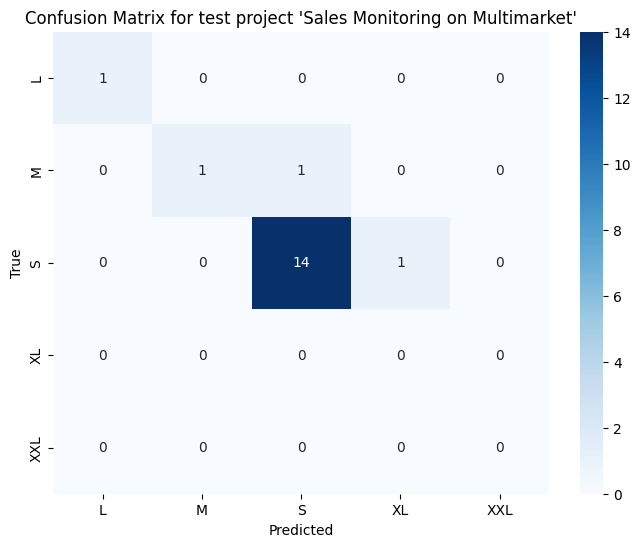

====================Multinomial Naive Bayes====================

Classification report for test project 'Sales Monitoring on Multimarket':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         1
           M       0.00      0.00      0.00         2
           S       0.91      0.67      0.77        15
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         0

   micro avg       0.91      0.56      0.69        18
   macro avg       0.18      0.13      0.15        18
weighted avg       0.76      0.56      0.64        18
 samples avg       0.56      0.56      0.56        18

Precision: 0.7575757575757576     Recall: 0.5555555555555556      Accuracy: 0.5555555555555556      F1 Score: 0.641025641025641

Confusion matrix for test project 'Sales Monitoring on Multimarket':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

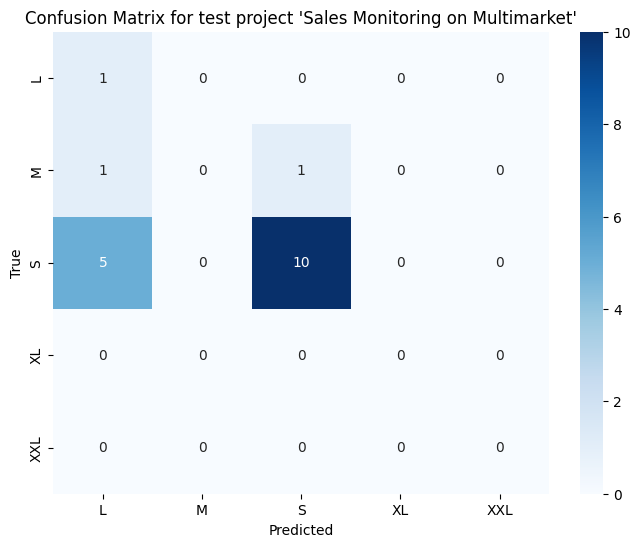

====================Adaboost====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      1.00      1.00         5
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         2

   micro avg       1.00      0.75      0.86         8
   macro avg       0.40      0.40      0.40         8
weighted avg       0.75      0.75      0.75         8
 samples avg       0.75      0.75      0.75         8

Precision: 0.75     Recall: 0.75      Accuracy: 0.75      F1 Score: 0.75

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

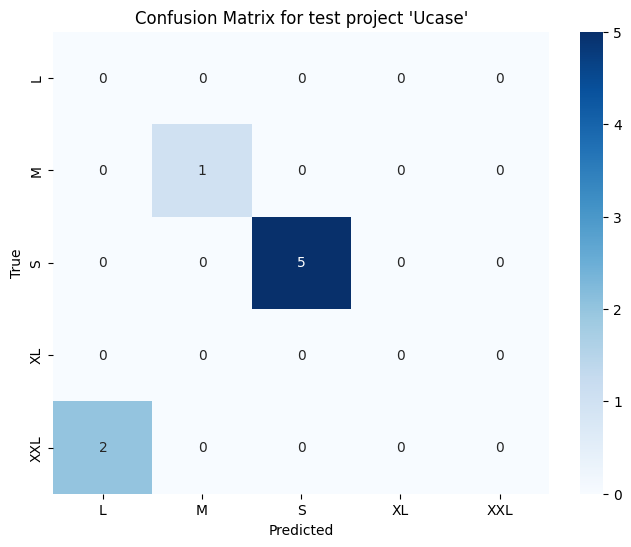

====================Decision Tree====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      0.80      0.89         5
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         2

   micro avg       1.00      0.62      0.77         8
   macro avg       0.40      0.36      0.38         8
weighted avg       0.75      0.62      0.68         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.75     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.6805555555555556

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

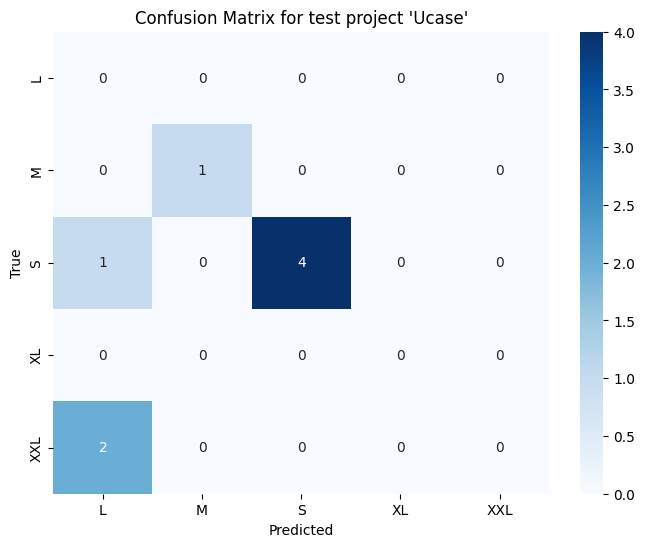

====================Multinomial Naive Bayes====================

Classification report for test project 'Ucase':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.83      1.00      0.91         5
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         2

   micro avg       0.83      0.62      0.71         8
   macro avg       0.17      0.20      0.18         8
weighted avg       0.52      0.62      0.57         8
 samples avg       0.62      0.62      0.62         8

Precision: 0.5208333333333334     Recall: 0.625      Accuracy: 0.625      F1 Score: 0.5681818181818181

Confusion matrix for test project 'Ucase':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

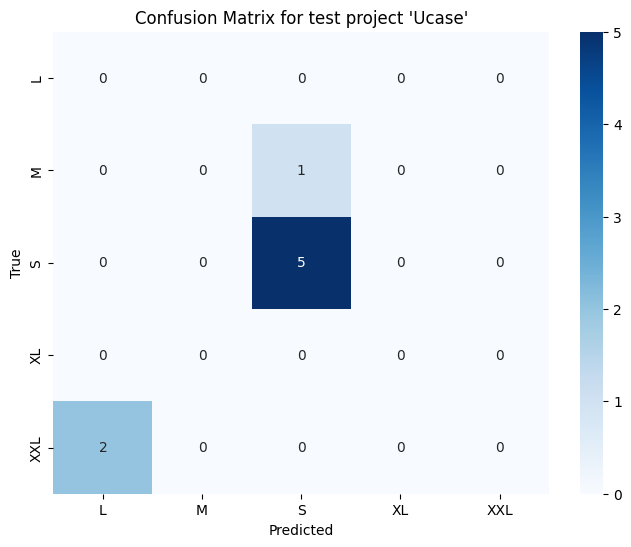

====================Adaboost====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       1.00      0.86      0.92         7
          XL       0.00      0.00      0.00         0
         XXL       1.00      0.33      0.50         3

   micro avg       1.00      0.73      0.84        11
   macro avg       0.60      0.44      0.48        11
weighted avg       1.00      0.73      0.81        11
 samples avg       0.73      0.73      0.73        11

Precision: 1.0     Recall: 0.7272727272727273      Accuracy: 0.7272727272727273      F1 Score: 0.8146853146853146

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

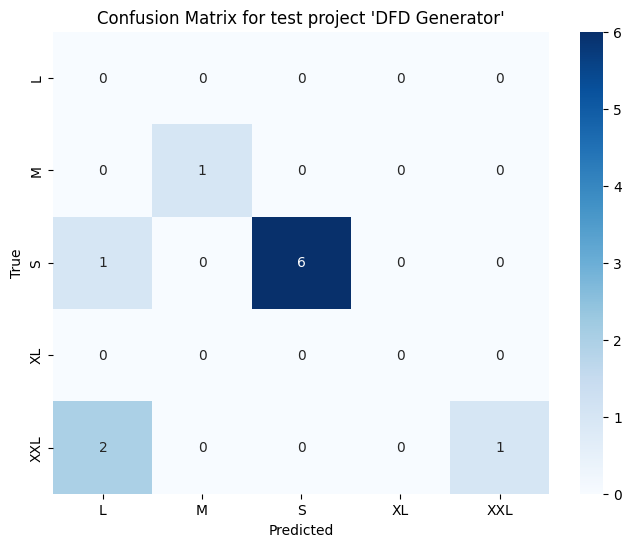

====================Decision Tree====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.50      1.00      0.67         1
           S       1.00      0.57      0.73         7
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         3

   micro avg       0.71      0.45      0.56        11
   macro avg       0.30      0.31      0.28        11
weighted avg       0.68      0.45      0.52        11
 samples avg       0.45      0.45      0.45        11

Precision: 0.6818181818181818     Recall: 0.45454545454545453      Accuracy: 0.45454545454545453      F1 Score: 0.5234159779614326

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

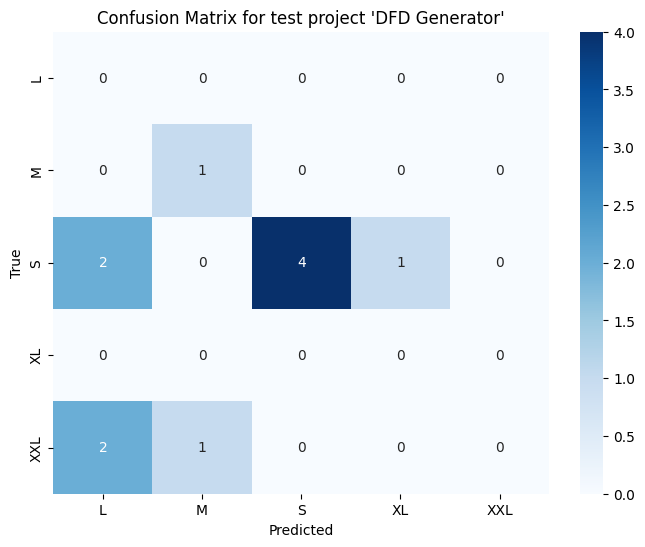

====================Multinomial Naive Bayes====================

Classification report for test project 'DFD Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.88      1.00      0.93         7
          XL       0.00      0.00      0.00         0
         XXL       0.00      0.00      0.00         3

   micro avg       0.88      0.64      0.74        11
   macro avg       0.17      0.20      0.19        11
weighted avg       0.56      0.64      0.59        11
 samples avg       0.64      0.64      0.64        11

Precision: 0.5568181818181818     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.5939393939393939

Confusion matrix for test project 'DFD Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

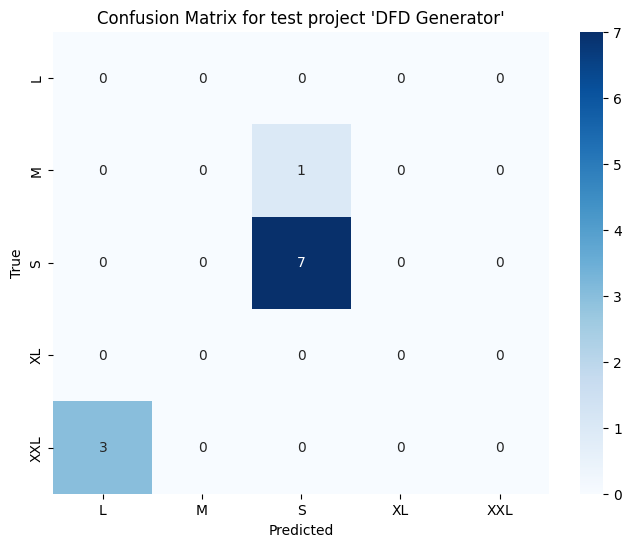

====================Adaboost====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.86      0.86      0.86         7
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         1

   micro avg       0.88      0.64      0.74        11
   macro avg       0.37      0.37      0.37        11
weighted avg       0.64      0.64      0.64        11
 samples avg       0.64      0.64      0.64        11

Precision: 0.6363636363636364     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.6363636363636364

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

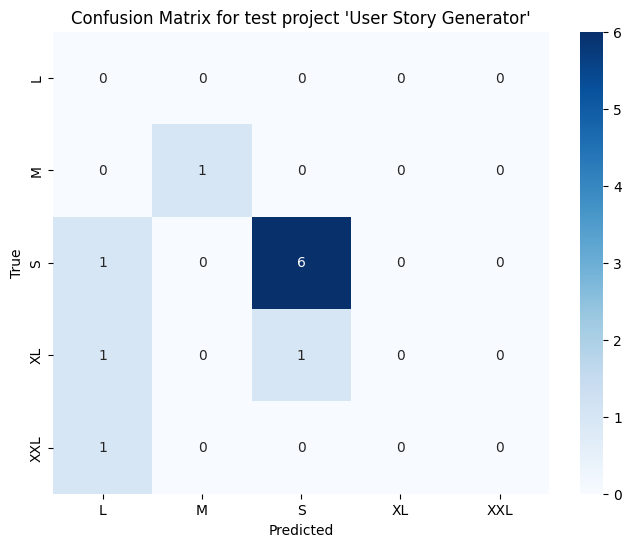

====================Decision Tree====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       1.00      1.00      1.00         1
           S       0.75      0.86      0.80         7
          XL       0.00      0.00      0.00         2
         XXL       0.17      1.00      0.29         1

   micro avg       0.53      0.73      0.62        11
   macro avg       0.38      0.57      0.42        11
weighted avg       0.58      0.73      0.63        11
 samples avg       0.59      0.73      0.64        11

Precision: 0.5833333333333334     Recall: 0.7272727272727273      Accuracy: 0.45454545454545453      F1 Score: 0.625974025974026

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

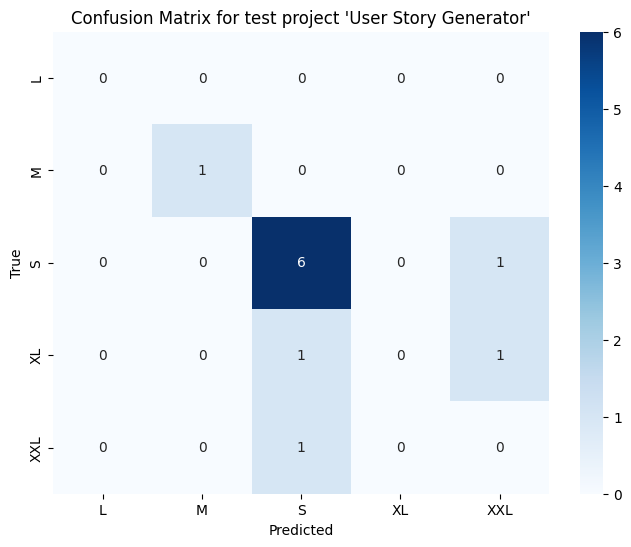

====================Multinomial Naive Bayes====================

Classification report for test project 'User Story Generator':
              precision    recall  f1-score   support

           L       0.00      0.00      0.00         0
           M       0.00      0.00      0.00         1
           S       0.64      1.00      0.78         7
          XL       0.00      0.00      0.00         2
         XXL       0.00      0.00      0.00         1

   micro avg       0.64      0.64      0.64        11
   macro avg       0.13      0.20      0.16        11
weighted avg       0.40      0.64      0.49        11
 samples avg       0.64      0.64      0.64        11

Precision: 0.4049586776859504     Recall: 0.6363636363636364      Accuracy: 0.6363636363636364      F1 Score: 0.494949494949495

Confusion matrix for test project 'User Story Generator':


c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mirtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

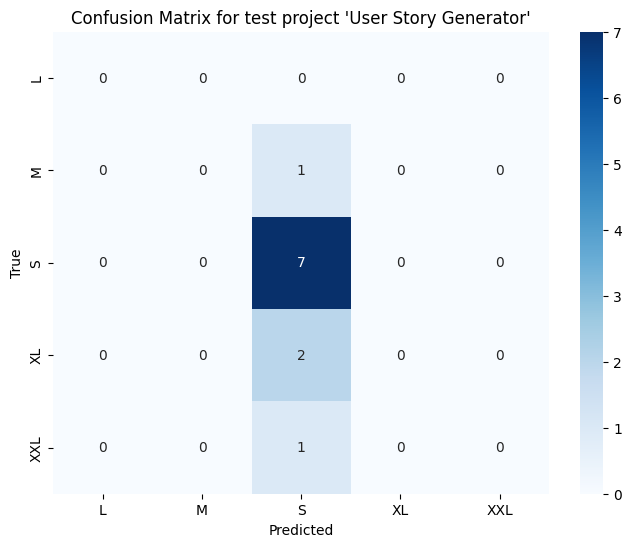

In [9]:
# Model (Teks) <== TF-IDF
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

unique_projects = df['Project Name'].unique()


accuracy_list_Adaboost = []
accuracy_list_DecisionTree = []
accuracy_list_MultinomialNB = []
precision_list_Adaboost = []
precision_list_DecisionTree = []
precision_list_MultinomialNB = []
recall_list_Adaboost = []
recall_list_DecisionTree = []
recall_list_MultinomialNB = []
f1_score_list_Adaboost = []
f1_score_list_DecisionTree = []
f1_score_list_MultinomialNB = []
mean_accuracy = []

modelAdaboost = MultiOutputClassifier(AdaBoostClassifier(algorithm="SAMME", random_state=0))
modelDecisionTree = MultiOutputClassifier(DecisionTreeClassifier(random_state=0))
modelMNB = MultiOutputClassifier(MultinomialNB())

# Loop through each unique project name as test data
for test_project_name in unique_projects:
    # Get data for the test project
    test_project_data = df[df['Project Name'] == test_project_name]
    test_indices = test_project_data.index
    X_test = tfidf_df.loc[test_indices]

    # Get data for training projects (all data except the test project)
    train_projects_data = df[df['Project Name'] != test_project_name]
    train_indices = train_projects_data.index
    X_train = tfidf_df.loc[train_indices]

    # One hot encode the target variable for training data
    y_train = effort_dense_array[train_projects_data.index]

    # One hot encode the target variable for test data
    y_test = effort_dense_array[test_project_data.index]

    # Adaboost
    modelAdaboost.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelAdaboost.predict(X_test)

    print("====================Adaboost====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_Adaboost.append(accuracy)
    precision_list_Adaboost.append(precision)
    recall_list_Adaboost.append(recall)
    f1_score_list_Adaboost.append(f1)

    # Decision Tree
    modelDecisionTree.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelDecisionTree.predict(X_test)

    print("====================Decision Tree====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_DecisionTree.append(accuracy)
    precision_list_DecisionTree.append(precision)
    recall_list_DecisionTree.append(recall)
    f1_score_list_DecisionTree.append(f1)

    # Decision Tree
    modelMNB.fit(X_train, y_train)

    # Use the model to make predictions
    y_pred = modelMNB.predict(X_test)

    print("====================Multinomial Naive Bayes====================")

    # Compute and print classification report
    print(f"\nClassification report for test project '{test_project_name}':")
    print(classification_report(y_test, y_pred, target_names=encoder.categories_[0]))

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", precision, "    Recall:", recall, "     Accuracy:", accuracy, "     F1 Score:", f1)

    # Compute and print confusion matrix
    print(f"\nConfusion matrix for test project '{test_project_name}':")
    # Compute confusion matrix
    cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), labels=range(len(encoder.categories_[0])))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
    plt.title(f"Confusion Matrix for test project '{test_project_name}'")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    accuracy_list_MultinomialNB.append(accuracy)
    precision_list_MultinomialNB.append(precision)
    recall_list_MultinomialNB.append(recall)
    f1_score_list_MultinomialNB.append(f1)

In [10]:
# Performance Report
# Simpan data ke dalam DataFrame
data = {
    "Project": unique_projects,
    'Precision_Adaboost': precision_list_Adaboost,
    'Recall_Adaboost': recall_list_Adaboost,
    'Accuracy_Adaboost': accuracy_list_Adaboost,
    'F1_Score_Adaboost': f1_score_list_Adaboost,
    'Precision_DecisionTree': precision_list_DecisionTree,
    'Recall_DecisionTree': recall_list_DecisionTree,
    'Accuracy_DecisionTree': accuracy_list_DecisionTree,
    'F1_Score_DecisionTree': f1_score_list_DecisionTree,
    'Precision_MultinomialNB': precision_list_MultinomialNB,
    'Recall_MultinomialNB': recall_list_MultinomialNB,
    'Accuracy_MultinomialNB': accuracy_list_MultinomialNB,
    'F1_Score_MultinomialNB': f1_score_list_MultinomialNB,
}

# Buat DataFrame
df_result = pd.DataFrame(data)

# Tampilkan DataFrame
df_result

,Project,Precision_Adaboost,Recall_Adaboost,Accuracy_Adaboost,F1_Score_Adaboost,Precision_DecisionTree,Recall_DecisionTree,Accuracy_DecisionTree,F1_Score_DecisionTree,Precision_MultinomialNB,Recall_MultinomialNB,Accuracy_MultinomialNB,F1_Score_MultinomialNB
0,Akobesi,0.636243,0.240506,0.240506,0.112039,0.630886,0.215190,0.202532,0.103177,0.051915,0.227848,0.227848,0.084562
1,Jisebi Checker,0.625000,0.625000,0.625000,0.625000,0.812500,0.750000,0.750000,0.765152,0.642857,0.750000,0.750000,0.692308
2,Novelty Checker,0.933333,0.700000,0.700000,0.770000,0.933333,0.700000,0.700000,0.770000,0.900000,0.700000,0.700000,0.787500
3,Journal Database Reviewer,0.636054,0.500000,0.500000,0.539916,0.683673,0.500000,0.500000,0.575630,0.519481,0.571429,0.571429,0.544218
4,Git Trackr,0.300000,0.500000,0.500000,0.375000,0.583333,0.500000,0.333333,0.507937,0.300000,0.500000,0.500000,0.375000
5,Seareq,0.800000,0.800000,0.800000,0.800000,0.600000,0.600000,0.600000,0.600000,0.533333,0.400000,0.400000,0.457143
6,Sales Monitoring on Multimarket,0.884921,0.777778,0.777778,0.821201,0.888889,0.833333,0.833333,0.851852,0.757576,0.555556,0.555556,0.641026
7,Ucase,0.750000,0.750000,0.750000,0.750000,0.750000,0.625000,0.625000,0.680556,0.520833,0.625000,0.625000,0.568182
8,DFD Generator,1.000000,0.727273,0.727273,0.814685,0.681818,0.454545,0.454545,0.523416,0.556818,0.636364,0.636364,0.593939
9,User Story Generator,0.636364,0.636364,0.636364,0.636364,0.583333,0.727273,0.454545,0.625974,0.404959,0.636364,0.636364,0.494949


In [11]:
# Mean Accuracy
mean_accuracy.append(np.mean(accuracy_list_Adaboost))
mean_accuracy.append(np.mean(accuracy_list_DecisionTree))
mean_accuracy.append(np.mean(accuracy_list_MultinomialNB))

print("Mean Accuracy")
print(mean_accuracy)

Mean Accuracy
[0.6256920470528066, 0.5453289221327194, 0.5602559500977223]
